# Q1 Sobel

## a)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
# generate random matrix with size n*n
def generateRandomMatrix(n):
  return np.random.randint(low=0, high=255, size=(n, n))

In [3]:
# write convolution function
def convolve(matrix, kernel):

  
  image_height, image_width = matrix.shape
  kernel_height, kernel_width = kernel.shape

  kernel = np.flipud(np.fliplr(kernel)) #rotate kernel 180 degrees

  # pad the image with zeros
  pad_height = kernel_height // 2
  pad_width = kernel_width // 2
  padded_image = np.pad(matrix, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')


  output = np.zeros(matrix.shape)

  k=0
  for i in range(pad_height ,image_height + pad_height):
    m=0 
    for j in range(pad_width ,image_width + pad_width): 
      window = padded_image[i - pad_height : i + pad_height + 1 , j - pad_width : j + pad_width + 1] 
      output[k,m] = np.sum(np.multiply(window , kernel))
      m+=1
    k+=1 
  return output

In [4]:
# generate horizontal and vertical kernels
sobel_h = np.array([[-1,0,-1],
                    [-2,0,2],
                    [-1,0,1]])

sobel_v = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])

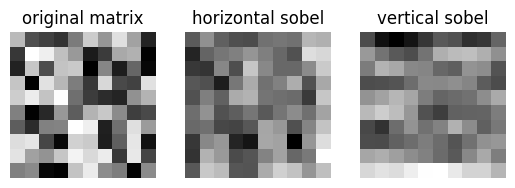

In [5]:
# convolve the initial matrix with kernels
matrix = generateRandomMatrix(10)
g_h = convolve(matrix,sobel_h)
g_v = convolve(matrix,sobel_v)

# plt.figure(figsize=(20,20))
array = [matrix,g_h,g_v]
array_titles = ['original matrix', 'horizontal sobel', 'vertical sobel']
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(array[i],cmap='gray')
  plt.title(array_titles[i])
  plt.axis('off')

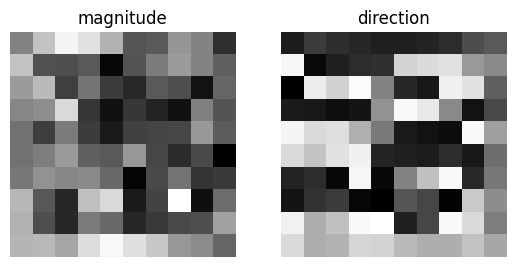

In [6]:
# generate magnitude and direction matrixes
magnitude = np.sqrt(g_h*g_h + g_v*g_v)
direction =  np.arctan2(g_v,g_h)

array1 = [magnitude,direction]
titles1 = ['magnitude', 'direction']
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.imshow(array1[i],cmap='gray')
  plt.title(titles1[i])
  plt.axis('off')

# print(magnitude,direction)

## b)

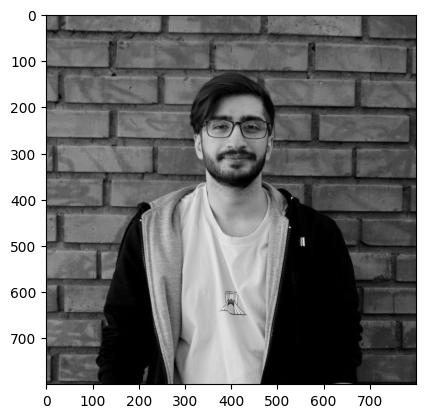

In [7]:
# load image and convert it to gray scale
gray_img = cv2.imread("images/afshin.jpg")
gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap='gray')

In [8]:
# define gaussian kernel
def generateGaussianKernel(size,sigma):

    filter_2d = np.zeros(size)

    for i in range(size[0]):
        for j in range(size[1]):
            x = i - size[0] // 2
            y = j - size[1] // 2
            filter_2d[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2)) #according to formula

    filter_2d /= np.sum(filter_2d) #normalize filter
    return filter_2d

gaussian_kernel = generateGaussianKernel((3,3),1.0)
print(gaussian_kernel)


[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


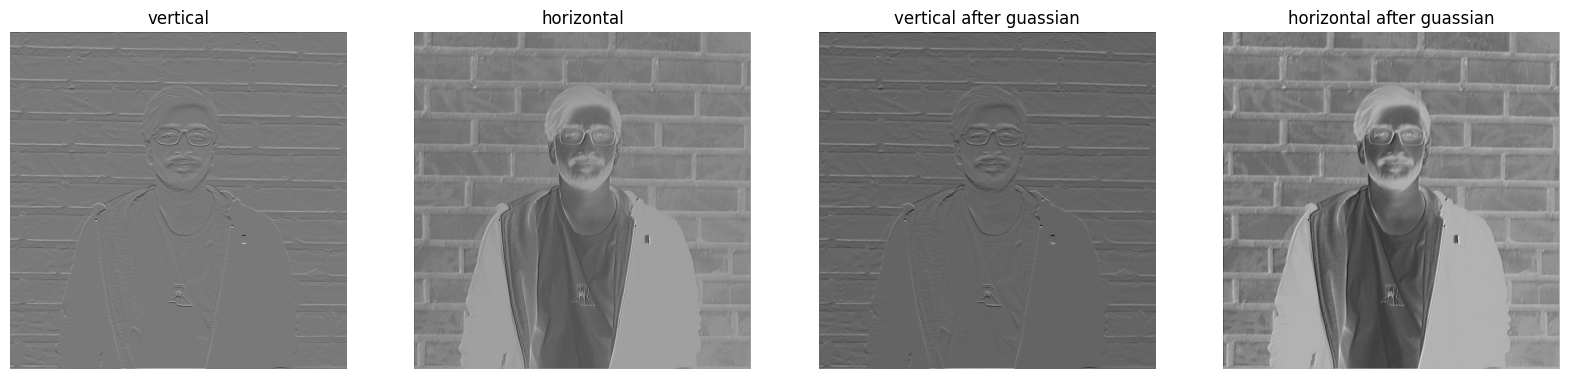

In [9]:
# generate Sobel outputs for 2 cases with gaussion filter and without gaussion filter and compare them
after_gaussian_img = convolve(gray_img,gaussian_kernel)
img_v = convolve(gray_img,sobel_v)
img_h = convolve(gray_img,sobel_h)
img_gaussian_v = convolve(after_gaussian_img,sobel_v)
img_gaussian_h = convolve(after_gaussian_img,sobel_h)

images = [img_v,img_h,img_gaussian_v,img_gaussian_h]
titles = ['vertical','horizontal','vertical after guassian','horizontal after guassian']
plt.figure(figsize=(20,20))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(images[i],cmap='gray')
  plt.title(titles[i])
  plt.axis('off')



## c)

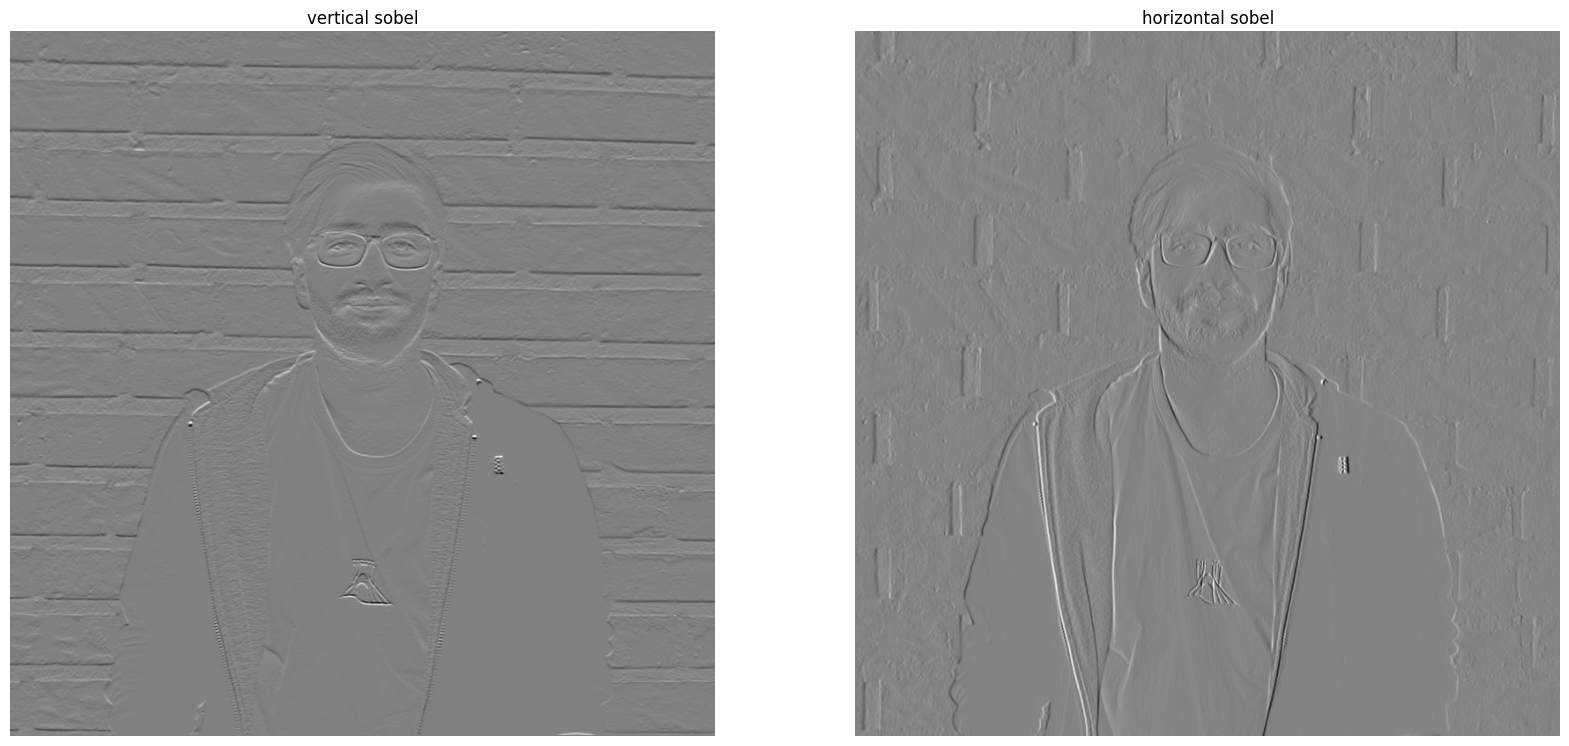

In [10]:
# do the operations in part b with OpenCV Sobel method and describe its parameters
img_sobel_h = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_v = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)

sobels = [img_sobel_v, img_sobel_h]
sobels_title = ['vertical sobel', 'horizontal sobel']
# plt.imshow(img_sobel_h,cmap='gray')
plt.figure(figsize=(20,20))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.imshow(sobels[i],cmap='gray')
  plt.title(sobels_title[i])
  plt.axis('off')
